# LABORATORIO DE INTELIGENCIA ARTIFICIAL 1

# Práctica 3: Clasificación Multiclase

+ __Estudiante 1:__
+ __Estudiante 2:__

## **0. Importar las librerías**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Cargar un conjunto de datos tabulares (0.5)**

### Wine Quality Data (Wine_Quality_Data.csv)

https://www.kaggle.com/datasets/ghassenkhaled/wine-quality-data

### 1.1 Ejercicio.

Cargue el conjunto de datos Wine_Quality_Data.csv

Indique breve y claramente en que consiste este dataset.

In [4]:
df = pd.read_csv('./Wine_Quality_Data.csv',  
                 na_values='?')

El data set contiene propiedades quimicas del vino como atributos

## **2. Análisis Exploratorio de los Datos - Limpieza - Preparación (1.5)**

### 2.1 Ejercicio.

Determine la cantidad de observaciones y atributos e identifique la variable Target.

In [7]:
df.shape

(6497, 13)

### 2.2 Ejercicio.

Determine los tipos de datos de los atributos e identifique si hay problemas con los tipos de datos o con los nombres de los atributos. En caso de existir implemente una estrategia para tratarlos.

In [50]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

### 2.3 Ejercicio.

Previsualice el contenido del dataframe

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 2.4 Ejercicio.

Lleve a cabo un análisis univariado del dataset y consigne sus observaciones.

In [5]:
# Análisis univariado de algunas variables clave
variables_clave = ["fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

for variable in variables_clave:
    print(f"Análisis de la variable '{variable}':")
    print("Resumen estadístico:")
    print(df[variable].describe())
    print("\nDistribución de valores:")
    print(df[variable].value_counts().sort_index())
    print("\n")

# Análisis de la variable categórica "color"
print("Análisis de la variable 'color':")
print("Distribución de valores:")
print(df["color"].value_counts())

Análisis de la variable 'fixed_acidity':
Resumen estadístico:
count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed_acidity, dtype: float64

Distribución de valores:
fixed_acidity
3.8     1
3.9     1
4.2     2
4.4     3
4.5     1
       ..
14.3    1
15.0    2
15.5    2
15.6    2
15.9    1
Name: count, Length: 106, dtype: int64


Análisis de la variable 'volatile_acidity':
Resumen estadístico:
count    6497.000000
mean        0.339666
std         0.164636
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile_acidity, dtype: float64

Distribución de valores:
volatile_acidity
0.080    4
0.085    1
0.090    1
0.100    6
0.105    6
        ..
1.180    1
1.185    1
1.240    1
1.330    2
1.580    1
Name: count, Length: 187, dtype: int64


Análisis de la variable 'citric_acid':
Resumen estadístico:
count 

### 2.5 Ejercicio.

Determine la distribución de la variable Target. Indique claramente cuántas son las clases, la cantidad de registros de cada una de ellas y su porcentaje. Consigne sus observaciones.

Text(0.5, 1.0, 'Color Distribution')

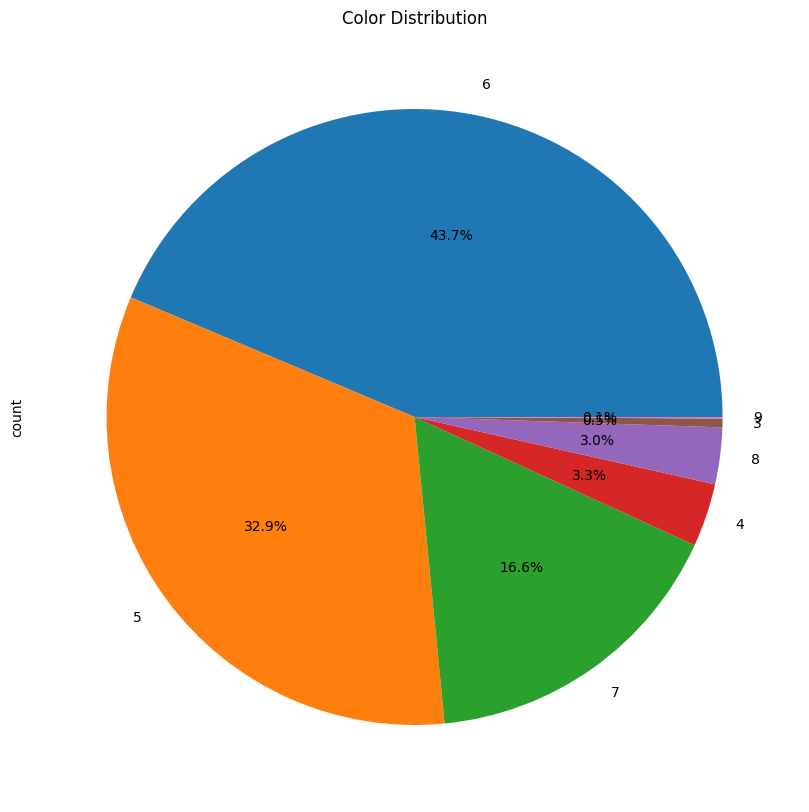

In [63]:
df["quality"].value_counts().plot.pie(
    figsize=(10, 10), autopct="%1.1f%%"
)
plt.title("Color Distribution")

In [54]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 2.6 Ejercicio.

Genere al menos 3 histogramas y consigne sus observaciones.

Text(0.5, 1.0, 'Histogram of Fixed Acidity')

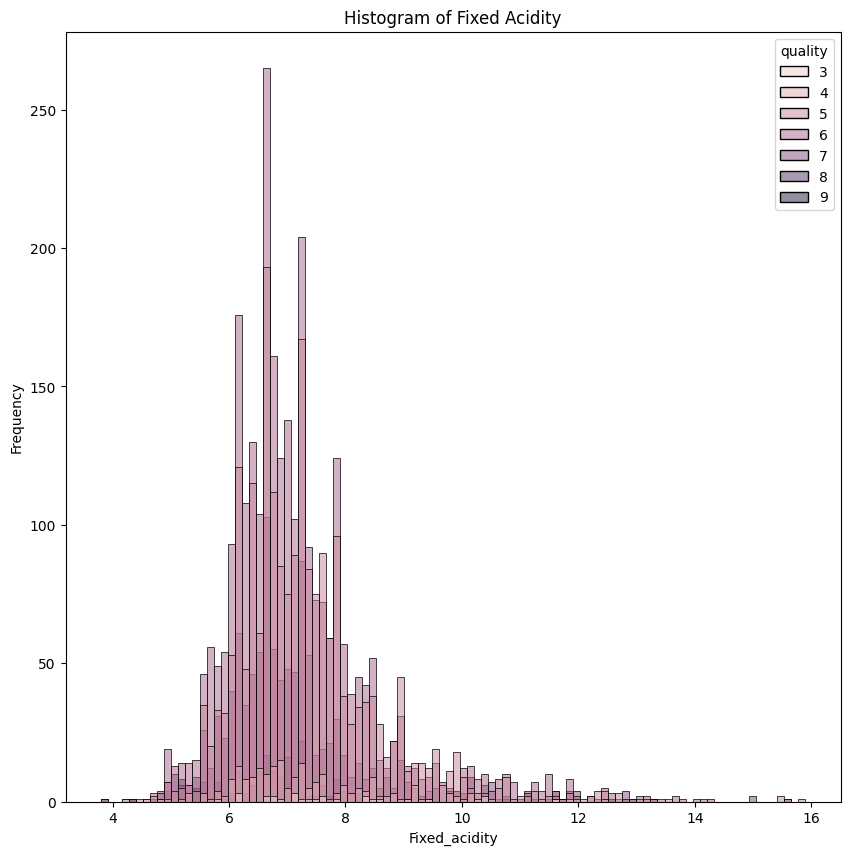

In [65]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="fixed_acidity", bins=100, hue="quality" ,fill=True)
plt.xlabel("Fixed_acidity")
plt.ylabel("Frequency")
plt.title("Histogram of Fixed Acidity")

Text(0.5, 1.0, 'Histogram of Volatile Acidity')

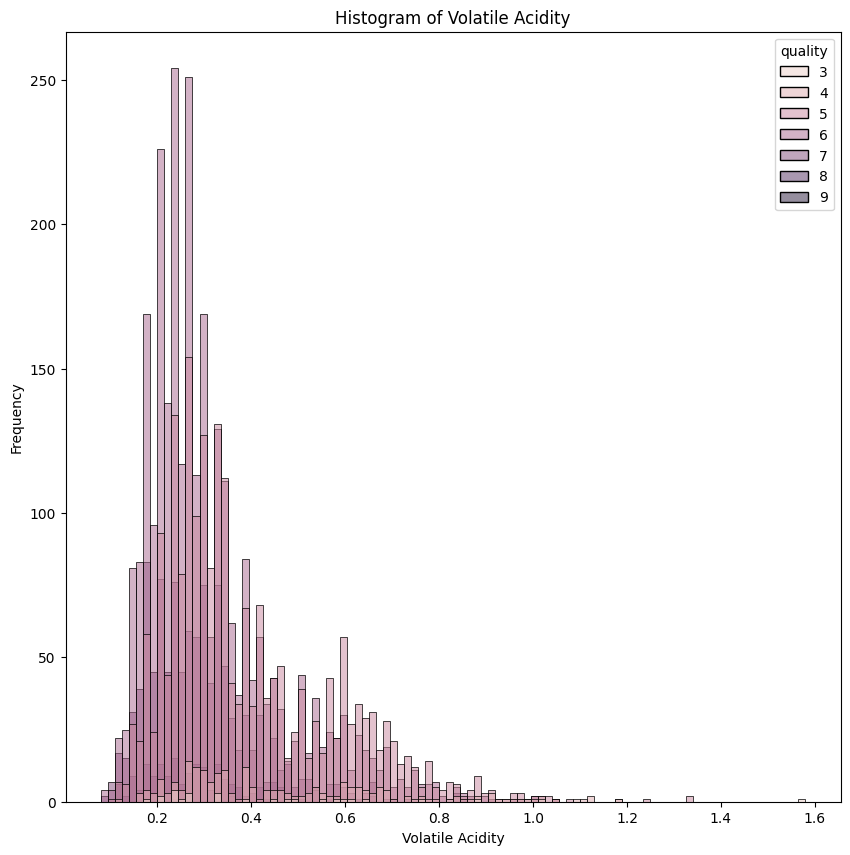

In [67]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="volatile_acidity", bins=100, hue="quality", fill=True)
plt.xlabel("Volatile Acidity")
plt.ylabel("Frequency")
plt.title("Histogram of Volatile Acidity")

Text(0.5, 1.0, 'Histogram of Citric Acid')

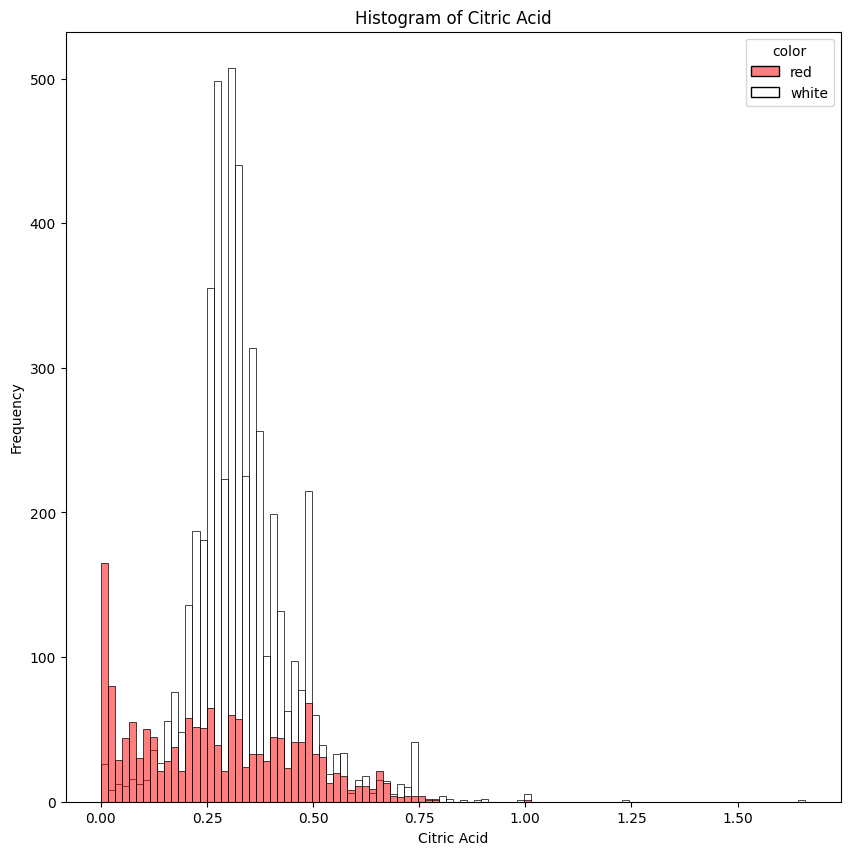

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="citric_acid", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Citric Acid")
plt.ylabel("Frequency")
plt.title("Histogram of Citric Acid")

Text(0.5, 1.0, 'Histogram of Residual Sugar')

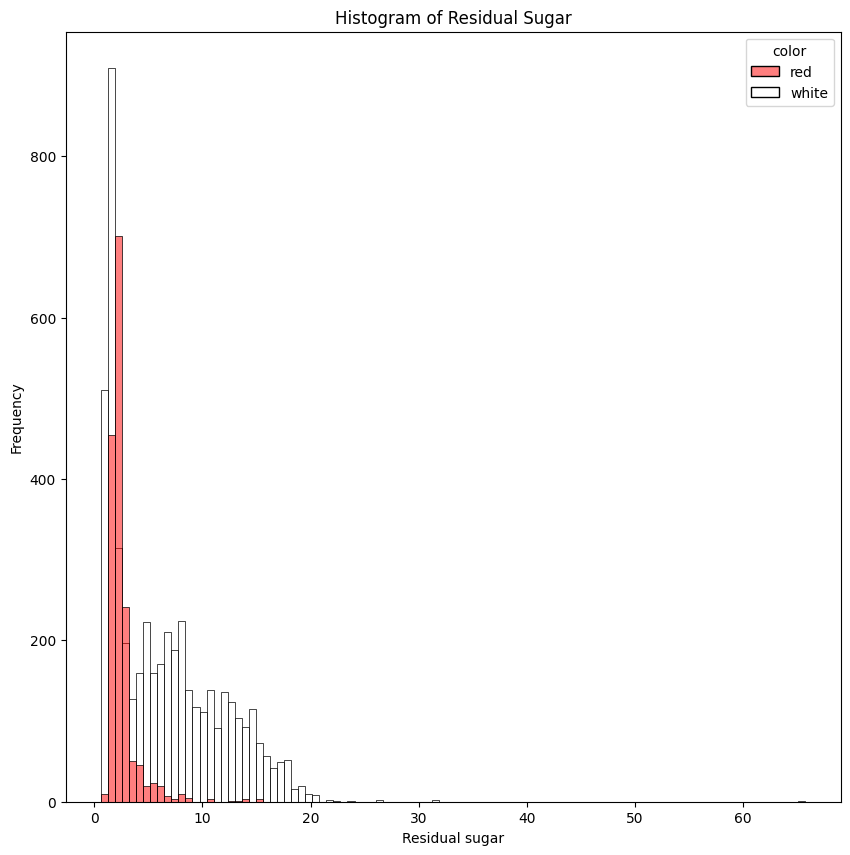

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="residual_sugar", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Residual sugar")
plt.ylabel("Frequency")
plt.title("Histogram of Residual Sugar")

Text(0.5, 1.0, 'Histogram of Chlorides')

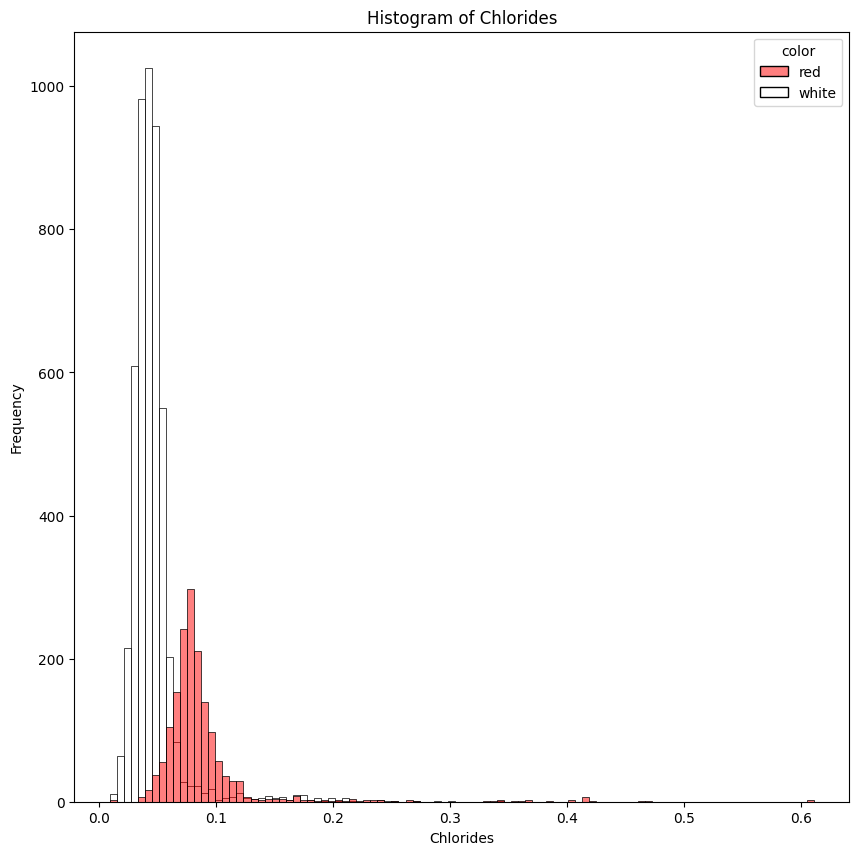

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="chlorides", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Chlorides")
plt.ylabel("Frequency")
plt.title("Histogram of Chlorides")

Text(0.5, 1.0, 'Histogram of Free Sulfur Dioxide')

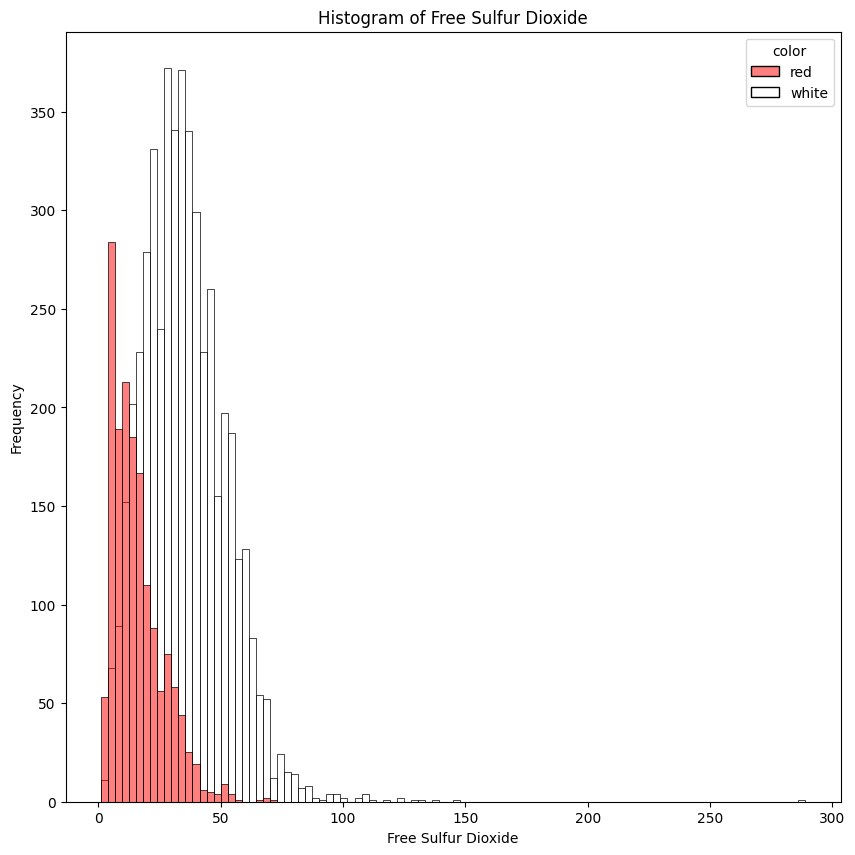

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="free_sulfur_dioxide", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Free Sulfur Dioxide")
plt.ylabel("Frequency")
plt.title("Histogram of Free Sulfur Dioxide")

Text(0.5, 1.0, 'Histogram of Total Sulfur Dioxide')

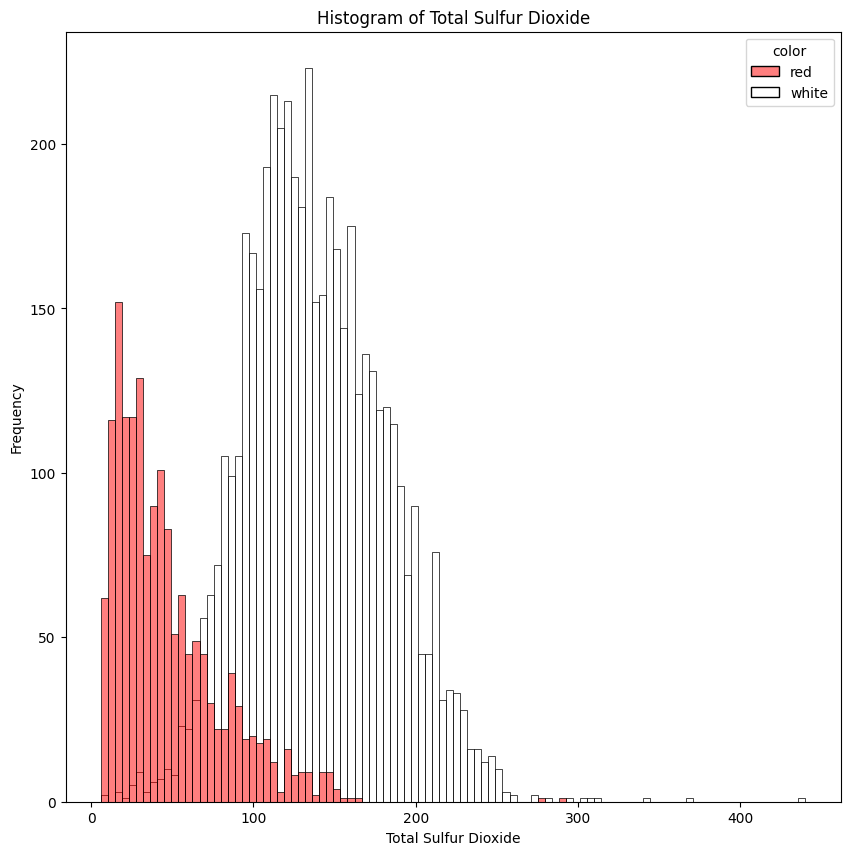

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="total_sulfur_dioxide", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Total Sulfur Dioxide")
plt.ylabel("Frequency")
plt.title("Histogram of Total Sulfur Dioxide")

Text(0.5, 1.0, 'Histogram of Density')

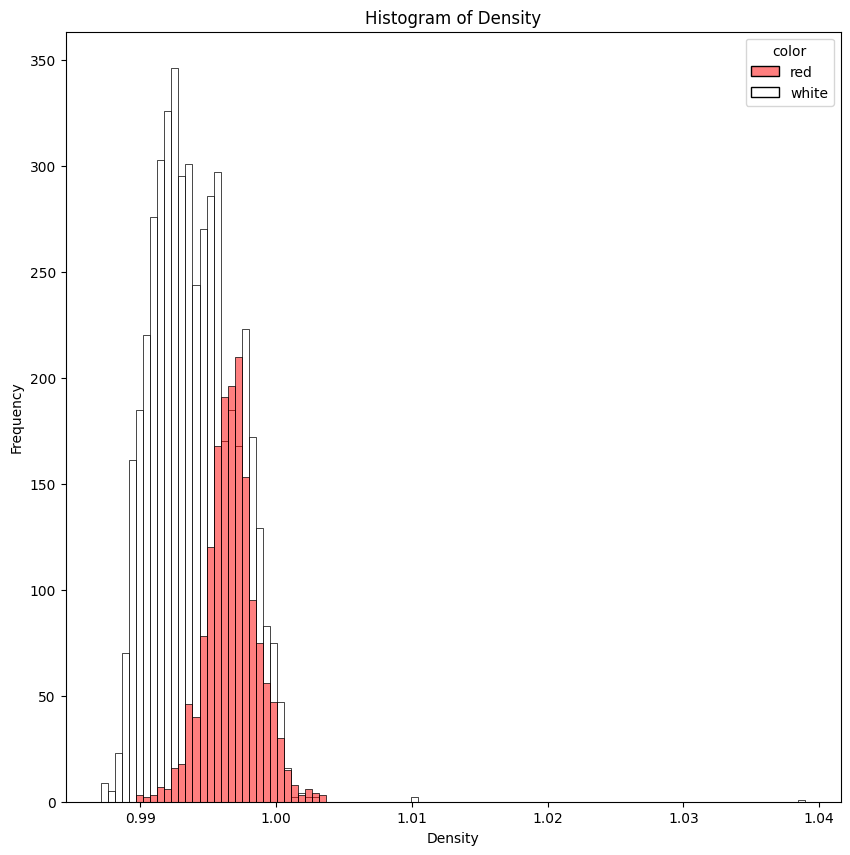

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="density", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Density")
plt.ylabel("Frequency")
plt.title("Histogram of Density")

Text(0.5, 1.0, 'Histogram of PH')

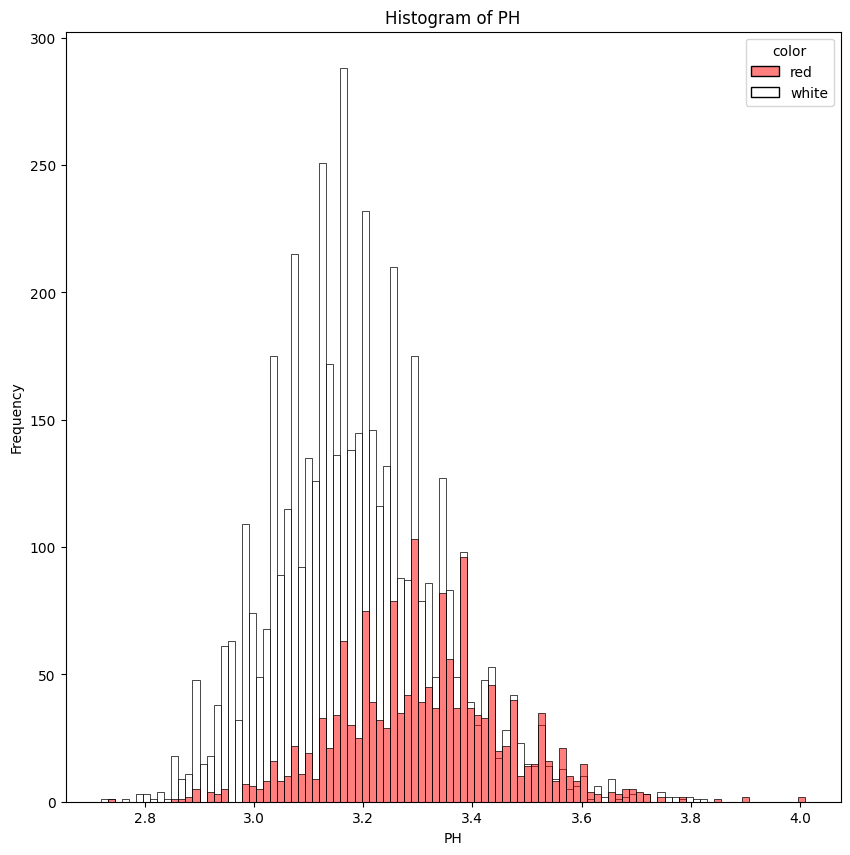

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="pH", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("PH")
plt.ylabel("Frequency")
plt.title("Histogram of PH")

Text(0.5, 1.0, 'Histogram of Sulphates')

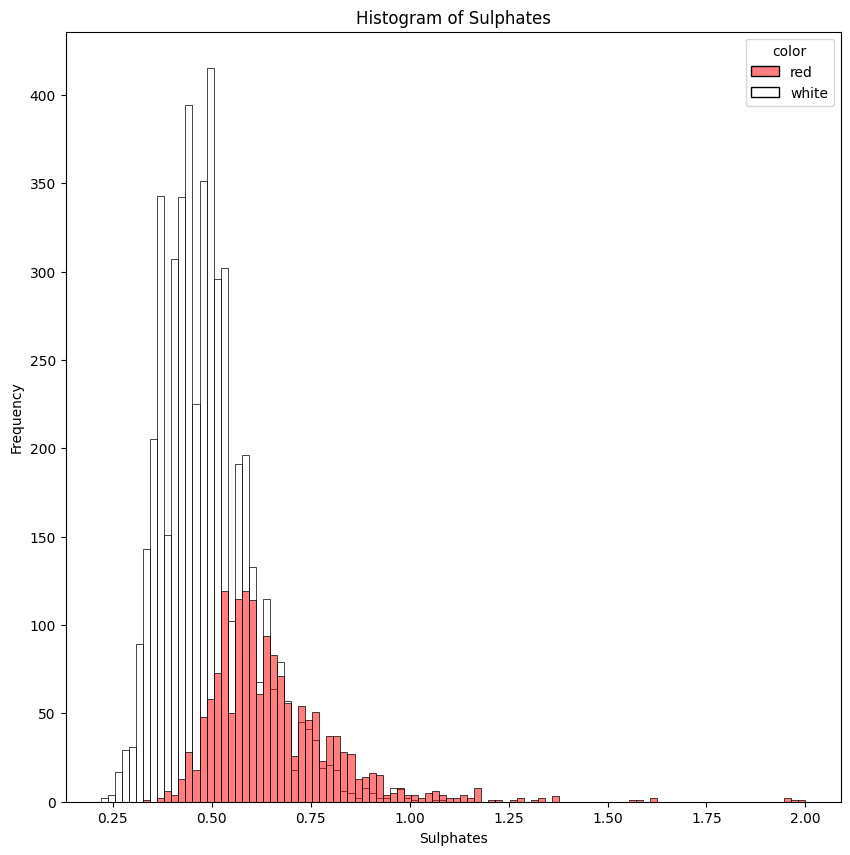

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="sulphates", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Sulphates")
plt.ylabel("Frequency")
plt.title("Histogram of Sulphates")

Text(0.5, 1.0, 'Histogram of Alcohol')

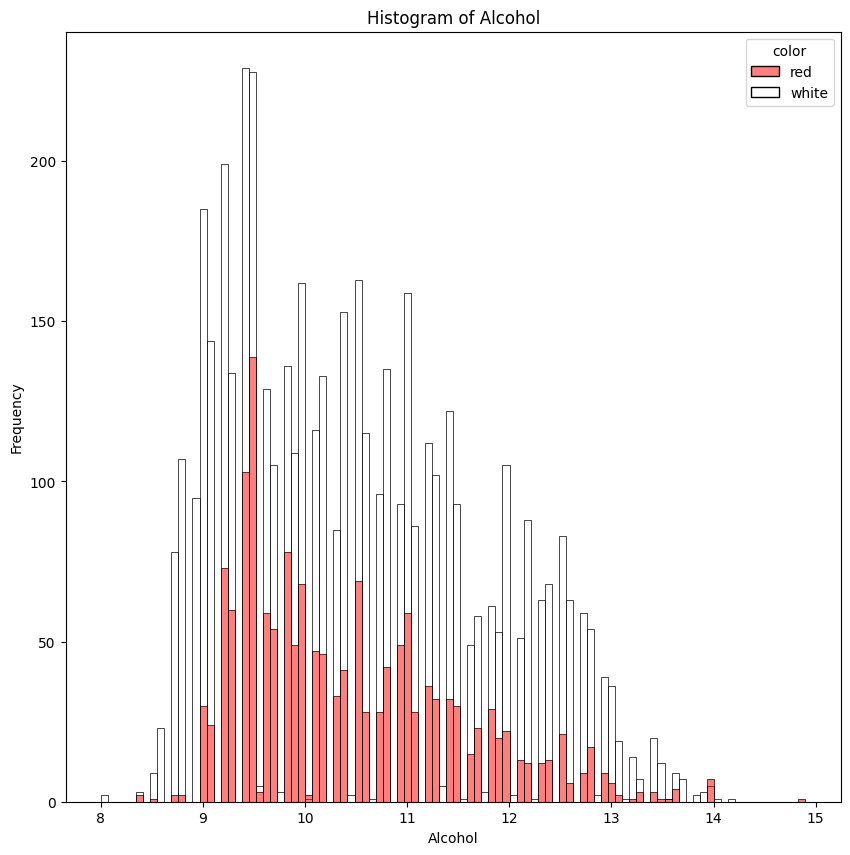

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="alcohol", bins=100, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.title("Histogram of Alcohol")

Text(0.5, 1.0, 'Histogram of Quality')

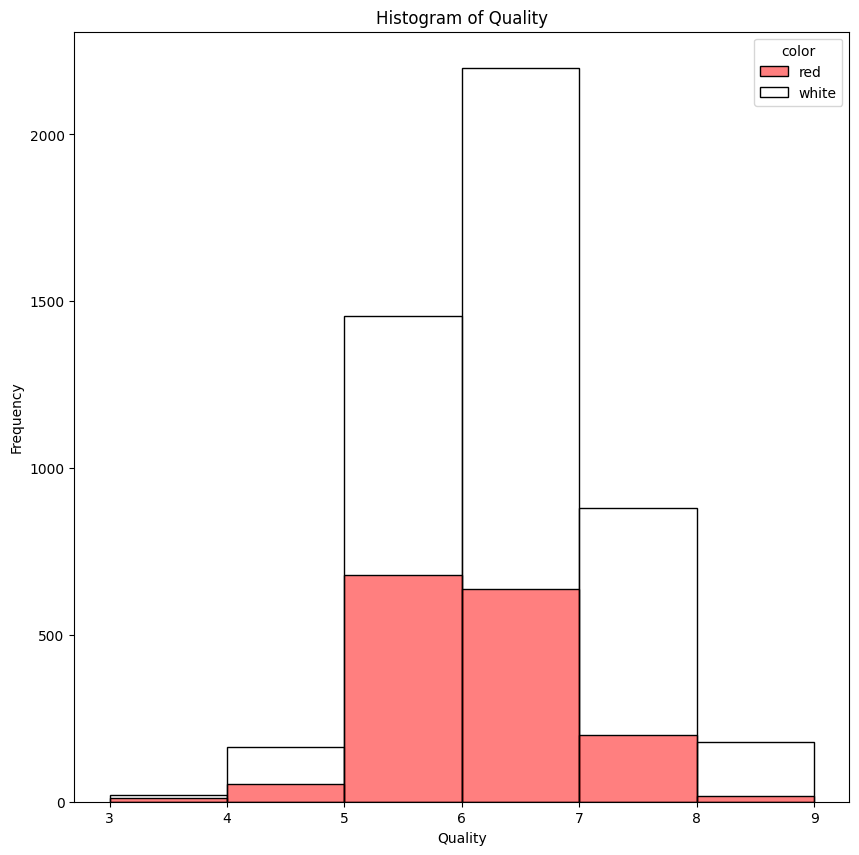

In [ ]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x="quality", bins=6, hue="color", fill=True, palette=custom_palette)
plt.xlabel("Quality")
plt.ylabel("Frequency")
plt.title("Histogram of Quality")

### 2.7 Ejercicio.

Realice el análisis bivariado del dataset y consigne sus observaciones.

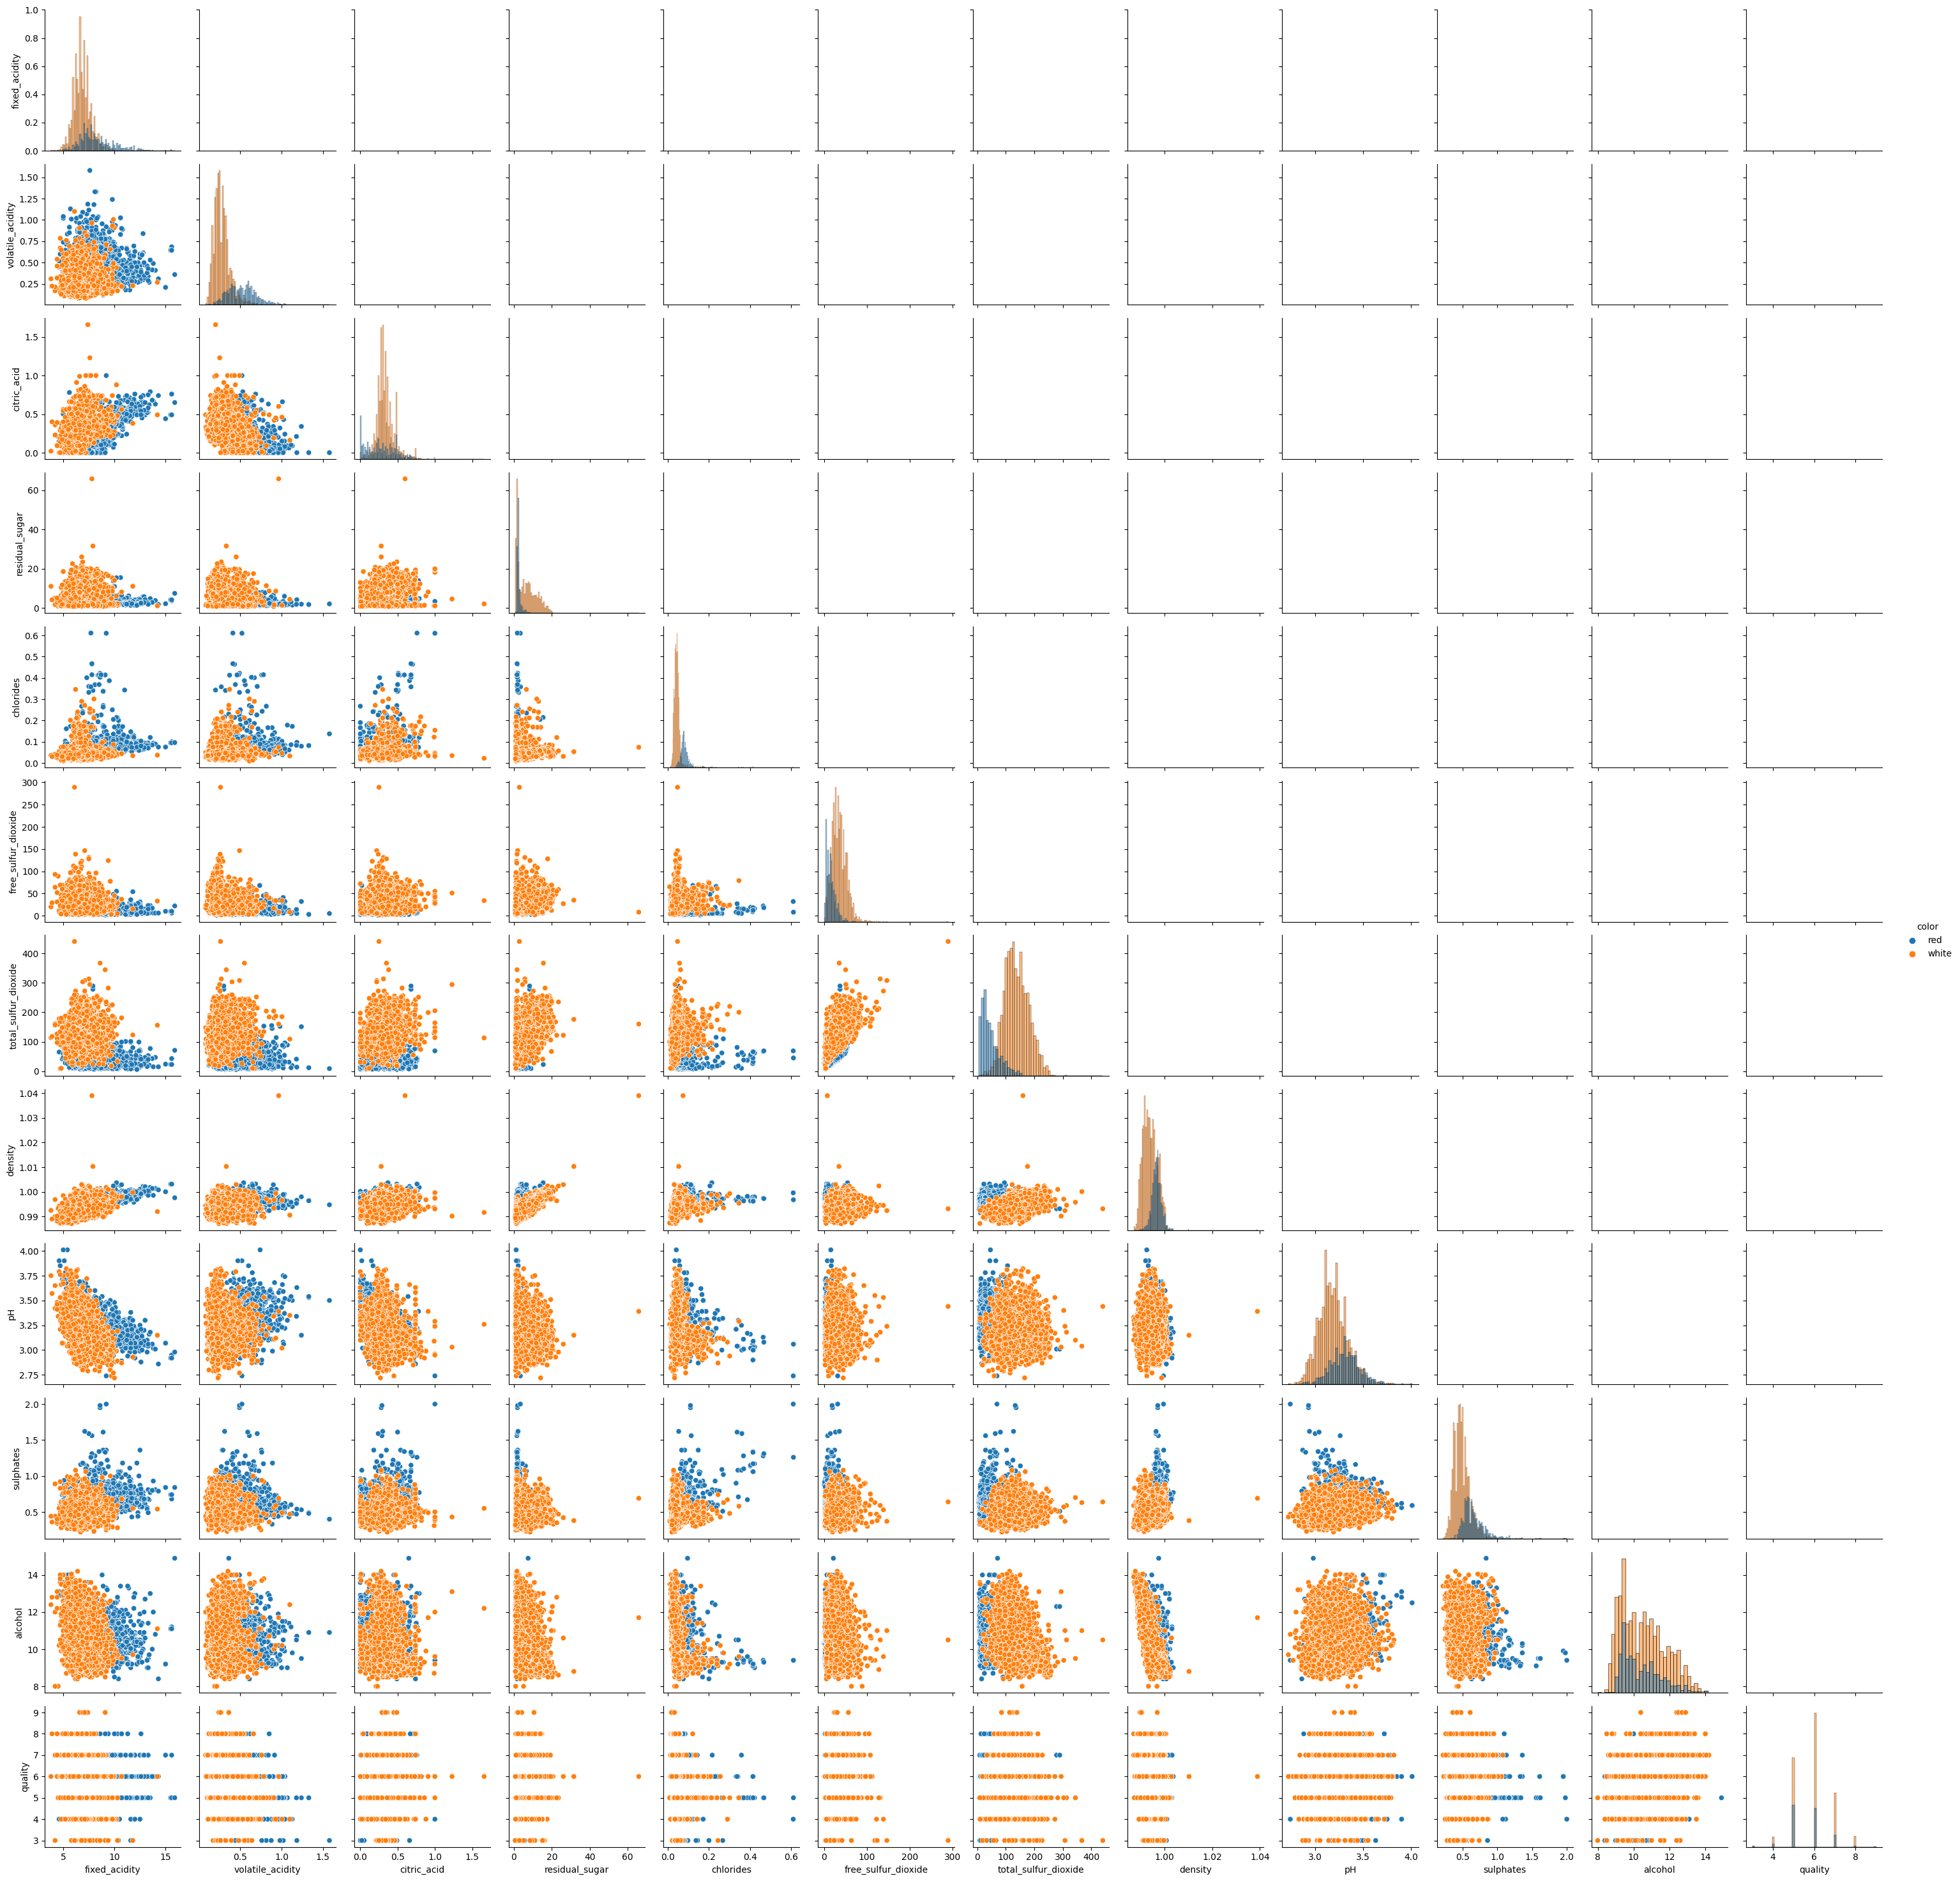

In [56]:
g = sns.PairGrid(
    data=df, diag_sharey=False, corner=False, hue="color"
)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

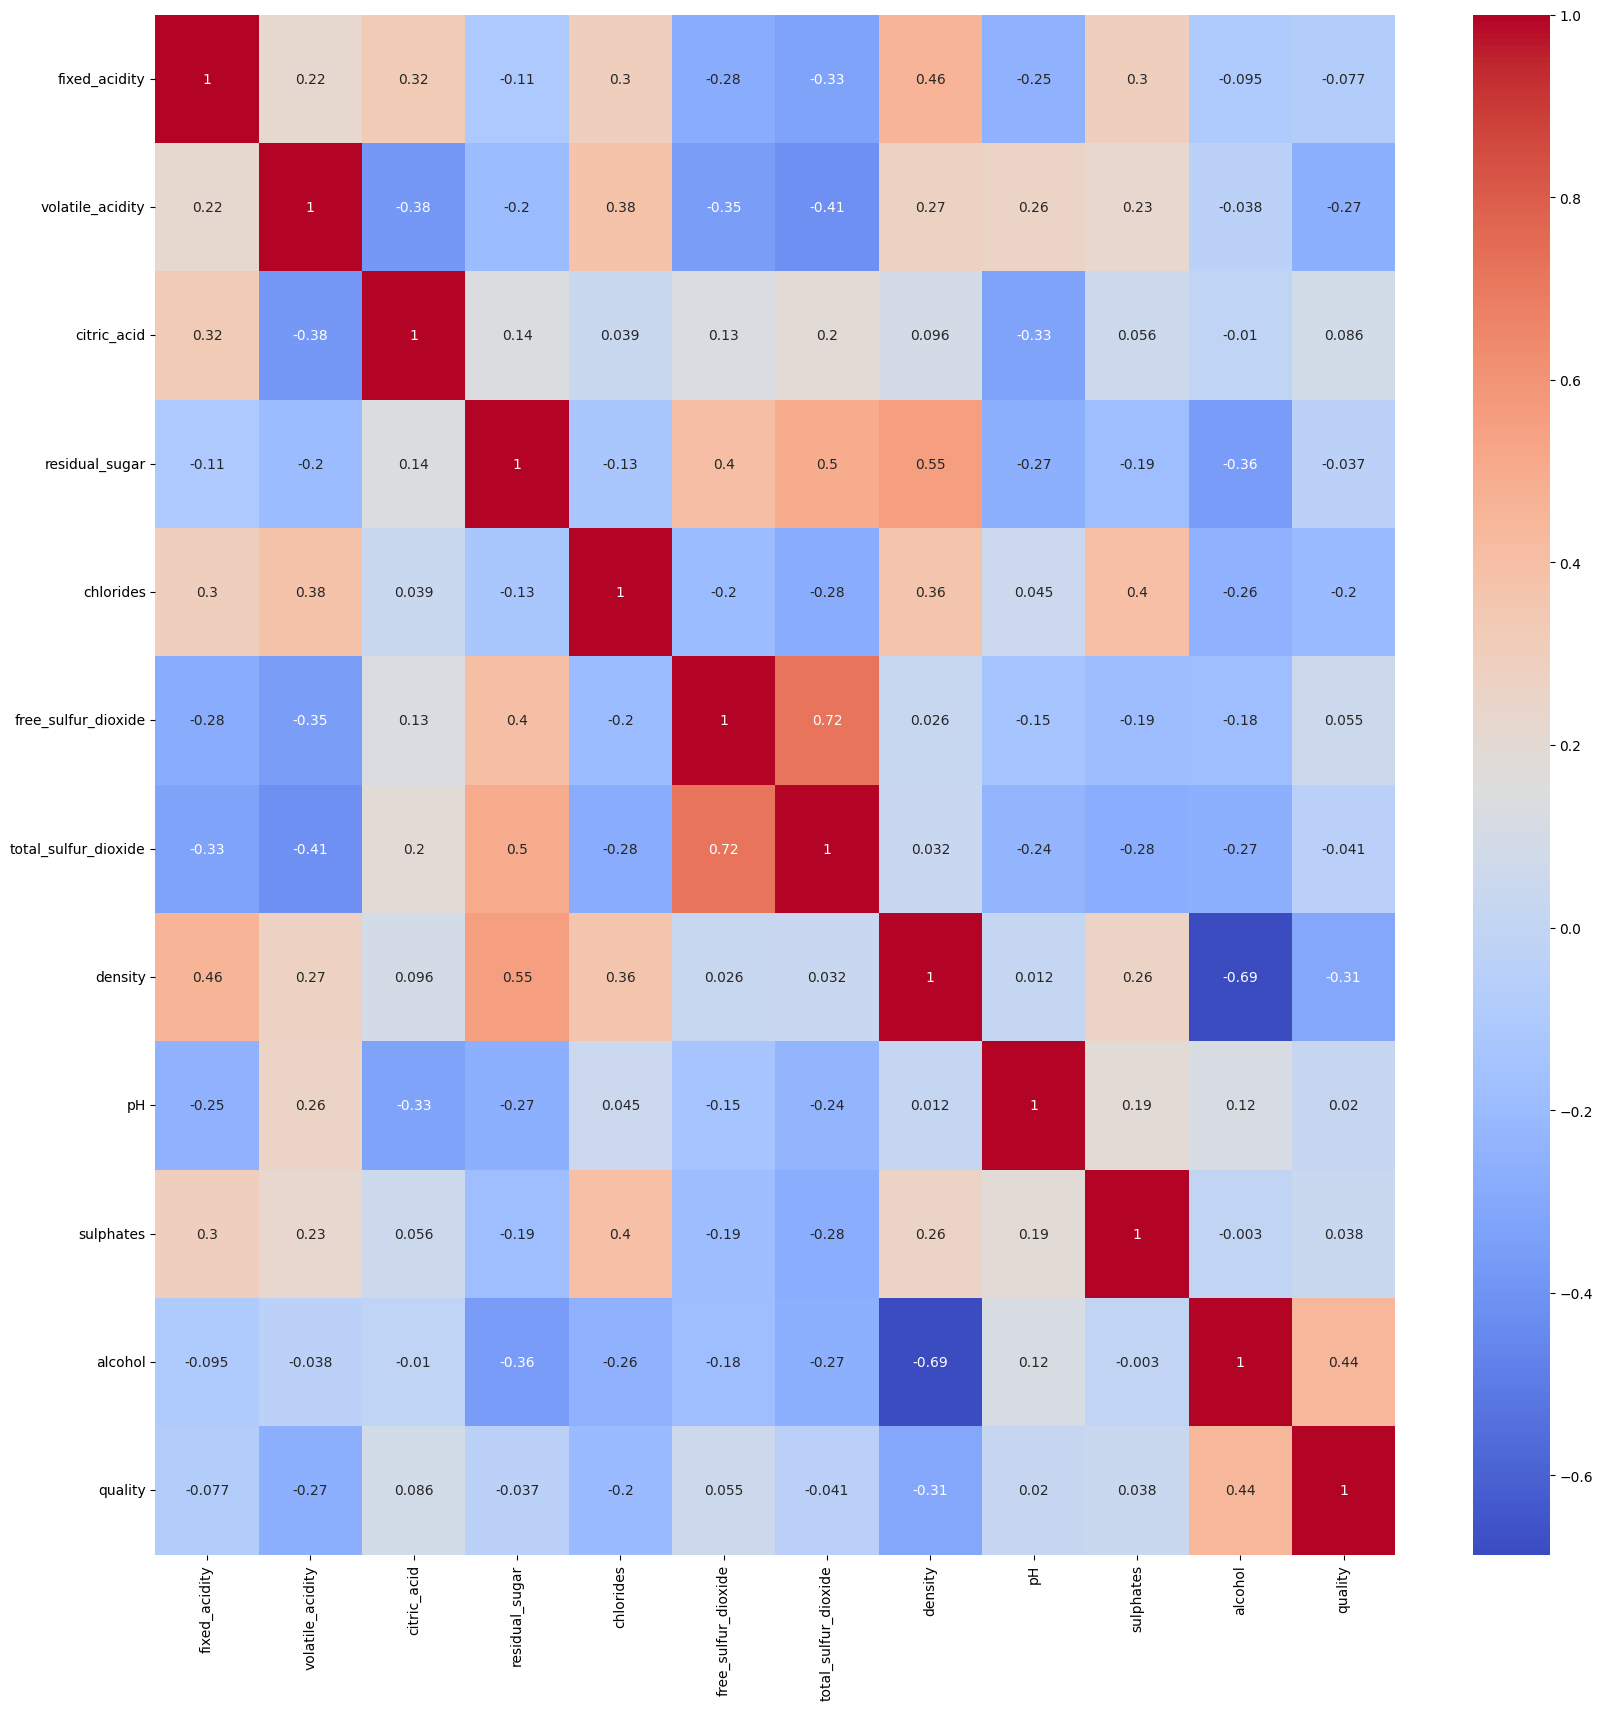

In [60]:
colums = [
    "fixed_acidity",
    "volatile_acidity",
    "citric_acid",
    "residual_sugar",
    "chlorides",
    "free_sulfur_dioxide",
    "total_sulfur_dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality"
]

plt.figure(figsize=(20, 20))
sns.heatmap(df[colums].corr(), annot=True, cmap="coolwarm")
plt.show

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


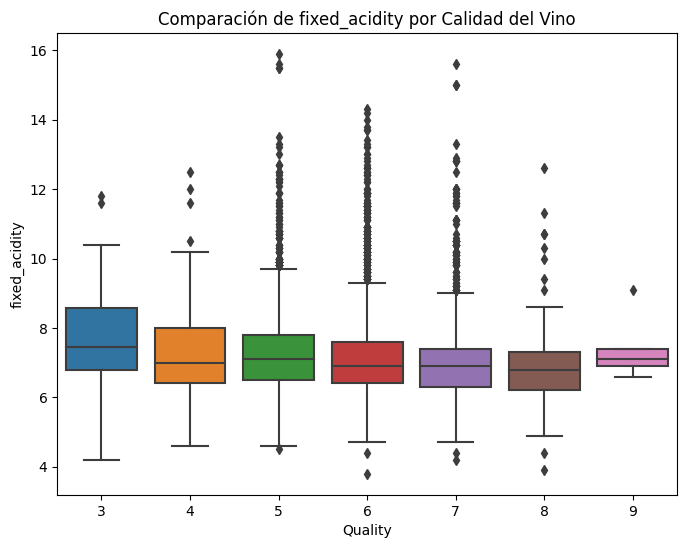

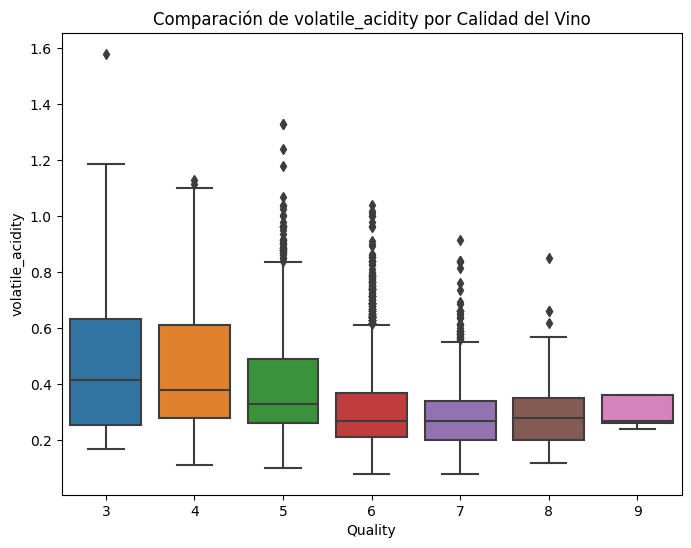

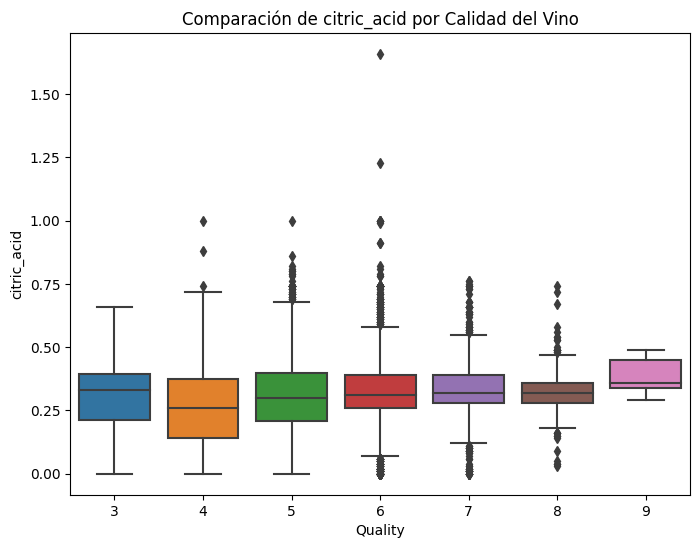

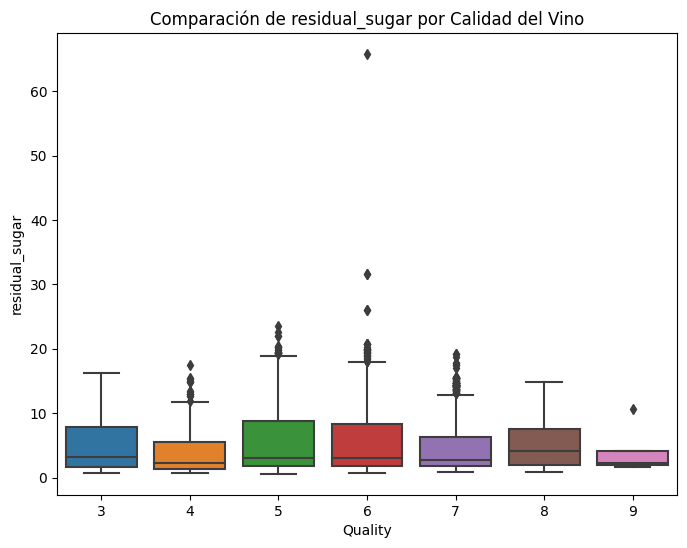

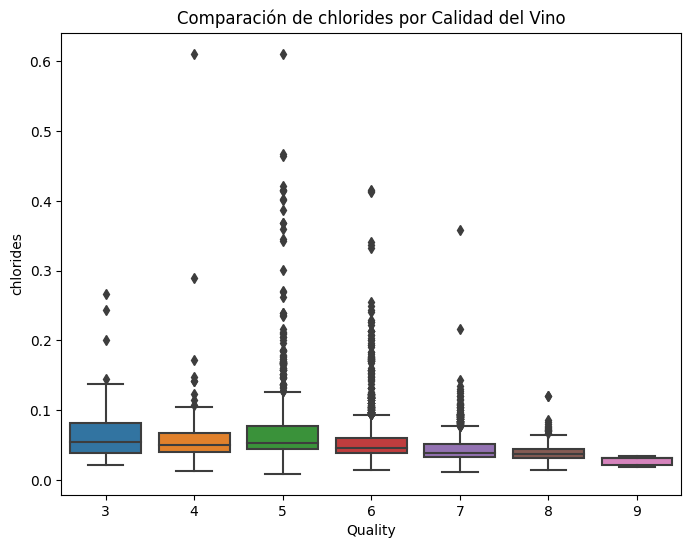

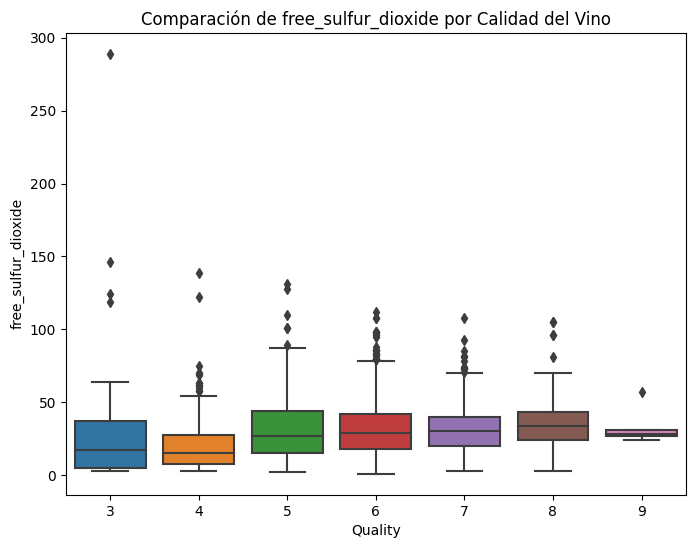

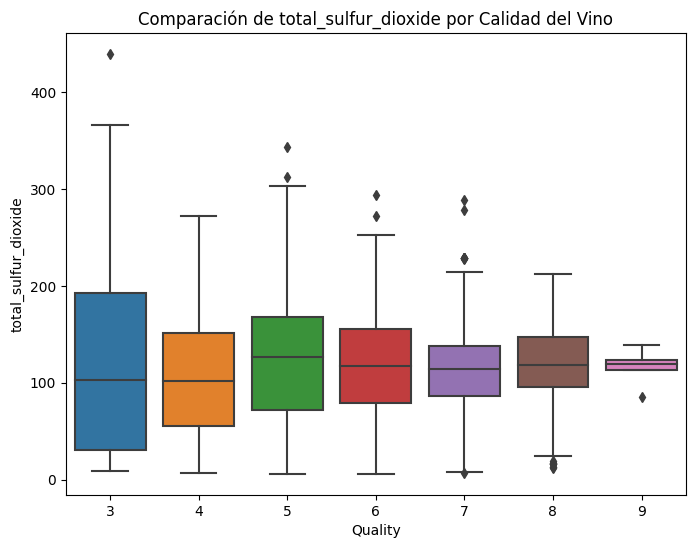

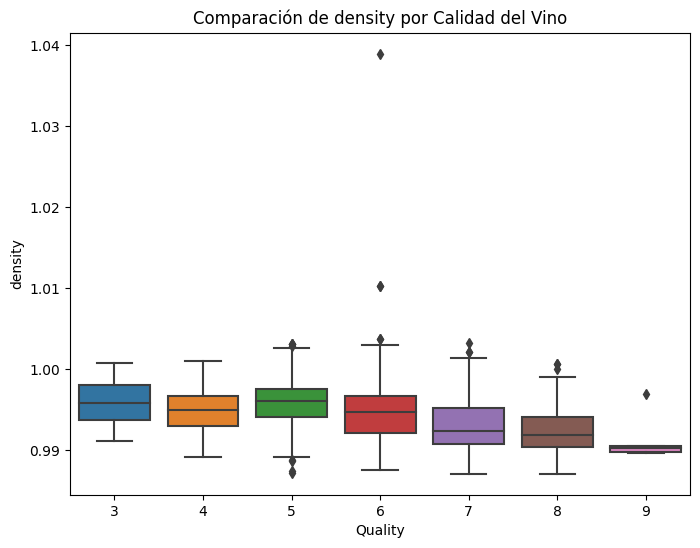

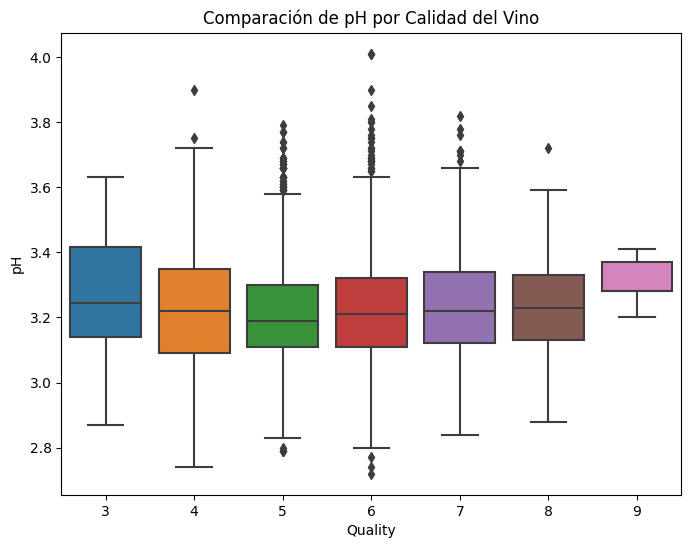

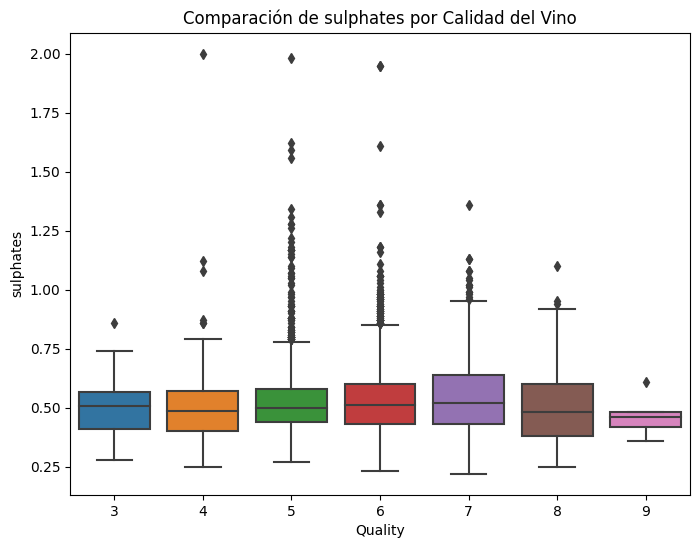

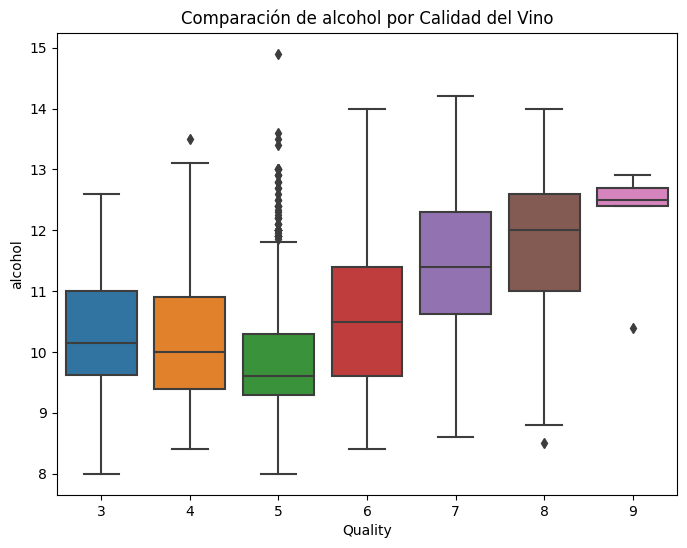

In [7]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='quality', y=feature)
    plt.title(f'Comparación de {feature} por Calidad del Vino')
    plt.xlabel('Quality')
    plt.ylabel(feature)
    plt.show()

### 2.8 Ejercicio.

Indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuanta hacer el procesamiento adecuado de los atributos que no sean numéricos.

### 2.9 Ejercicio.

Identifique si hay datos repetidos y datos nulos. En caso de existir implemente una estrategia para tratarlos.

### 2.10 Ejercicio.

Identifique si hay outliers. En caso de existir implemente una estrategia para tratarlos.

### 2.11 Ejercicio.

Depués de haber hecho la limpieza básica, indique la correlación que tienen los atributos con la variable Target y organícelos de mayor a menor. Tenga en cuanta hacer el procesamiento adecuado de los atributos que no sean numéricos.

# **3. Modelo y 4. Evaluación (3.0)**

### 3.1 Ejercicio.

Seleccione el conjunto de atributos que va a usar para entrenar el primer modelo de clasificación. Indique claramente por qué escogió esos atributos.

### 3.2 Ejercicio.

Construya cuatro modelos de clasificación utilizando los siguientes algoritmos:

- KNN
- Regresión Logística
- Ensembles.
- Otro método de su elección.

Entrene y evalúe el desempeño de los modelos por clase usando las métricas:

- Accuracy
- Precision
- Recall
- F1 score

Evalúe el desempeño general del modelo usando las métricas:

- Average Accuracy
- Average Precision
- Average Recall
- Average F1 score

Consigne sus observaciones, por ejemplo, cuáles clases se clasifican mejor, etc.

Compare el desempeño de los modelos usando las diferentes métricas y la curva ROC. Consigne sus observaciones.

### 3.3 Ejercicio.

Utilice Stratified Cross-Validation para evaluar la calidad de los modelos.

Indique cuál es la utilidad que tiene el método de evaluación Stratified Cross-Validation. Consigne sus observaciones respecto a la implementación y los resultados obtenidos.

### 3.4 Ejercicio

Modifique uno de los modelos de tal manera que el Accuracy (macro) se acerque lo más posible a 0.99. Recuerde que puede cambiar de atributos o los hiperparámetros del modelo. Indique por qué escogió ese modelo y qué cambios realizó.